Projeto Final
O objetivo do projeto final é encontrar uma forma de diminuir a taxa de inadimplência de uma prestadora de créditos, na qual está em 35%, a partir de um banco de dados não tratados em SQL.

In [1]:
import psycopg2
import pandas as pd
import statistics  as sts
import seaborn as srn
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from yellowbrick.classifier import ConfusionMatrix 
from sklearn.ensemble import RandomForestClassifier
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

In [2]:
conexao = psycopg2.connect(host="localhost",database="projetofinal", user="postgres", password="123456", port=5432)

In [3]:
#Informações dos clientes
cursor = conexao.cursor()
consulta = "select *from public.\"CLIENTES\""
cursor.execute(consulta)
Clientes = cursor.fetchall()

In [4]:
ClientesFinal = pd.DataFrame(Clientes)
ClientesFinal.columns = ["ID","Nome","Estado","Sexo"] 
ClientesFinal

,ID,Nome,Estado,Sexo
0,1,Adelina Buenaventura,RJ,M
1,2,Adelino Gago,RJ,M
2,3,Adélio Lisboa,SE,M
3,4,Adérito Bahía,MA,M
4,5,Adolfo Patrício,PE,M
...,...,...,...,...
245,246,Jandaíra Albuquerque,SP,F
246,247,Joana Ataí,GO,F
247,248,Joaquim Hurtado,AP,M
248,249,Joaquim Mieiro,TO,M


In [5]:
#Checado sem erros
#ClientesFinal.isnull().sum()
#Agrup1 = ClientesFinal.groupby(['Estado']).size()

In [6]:
#Informações dos empregos
consulta = "select *from public.\"EMPREGO\""
cursor.execute(consulta)
Emprego = cursor.fetchall()

In [7]:
EmpregoFinal = pd.DataFrame(Emprego)
EmpregoFinal.columns = ["ID","Emprego"] 
EmpregoFinal

,ID,Emprego
0,1,<1
1,2,>=7
2,3,1<=X<4
3,4,4<=X<7
4,5,Desempregado


In [8]:
#informações de Estado Civil
consulta = "select *from public.\"ESTADOCIVIL\""
cursor.execute(consulta)
EstadoCivil = cursor.fetchall()

In [9]:
EstCivFinal = pd.DataFrame(EstadoCivil)
EstCivFinal.columns = ["ID","Estado Civil"] 
EstCivFinal

,ID,Estado Civil
0,1,feminino div/dep/cas
1,2,maculino div/dep
2,3,masculino cas/viu
3,4,masculino solteiro


In [10]:
#informações de Fiador
consulta = "select *from public.\"FIADOR\""
cursor.execute(consulta)
Fiador = cursor.fetchall()

In [11]:
FiadorFinal = pd.DataFrame(Fiador)
FiadorFinal.columns = ["ID","Fiador"] 
FiadorFinal

,ID,Fiador
0,1,co aplicante
1,2,co requerente
2,3,nao
3,4,sim


In [12]:
#informações de Habitação
consulta = "select *from public.\"HABITACAO\""
cursor.execute(consulta)
Habitacao = cursor.fetchall()
#Habitacao

In [13]:
HabitFinal = pd.DataFrame(Habitacao)
HabitFinal.columns = ["ID","Habitação"] 
HabitFinal

,ID,Habitação
0,1,proria
1,2,de graca
2,3,alugada


In [14]:
#informações de Histórico de Crédito
consulta = "select *from public.\"HISTORICO_CREDITO\""
cursor.execute(consulta)
HistoricoCredito = cursor.fetchall()
#HistoricoCredito

In [15]:
HistCredFinal = pd.DataFrame(HistoricoCredito)
HistCredFinal.columns = ["ID","Histórico Crédito"] 
HistCredFinal

,ID,Histórico Crédito
0,1,Critico-outros creditos
1,2,existentes/pagos
2,3,Atrasos anteriores
3,4,sem creditos/todos pagos
4,5,todos pagos


In [16]:
#informações de Investimentos
consulta = "select *from public.\"INVESTIMENTOS\""
cursor.execute(consulta)
Investimentos = cursor.fetchall()
#Investimentos

In [17]:
InvestFinal = pd.DataFrame(Investimentos)
InvestFinal.columns = ["ID","Investimentos"] 
InvestFinal.head()

,ID,Investimentos
0,1,Desconhecido\n
1,2,<100\n
2,3,500<=X<1000
3,4,>=1000
4,5,100<=X<500


In [18]:
#informações de Outros Financiamentos
consulta = "select *from public.\"OUTROSFINANC\""
cursor.execute(consulta)
OutrosFinanciamentos = cursor.fetchall()
#OutrosFinanciamentos

In [19]:
OutrosFinanFinal = pd.DataFrame(OutrosFinanciamentos)
OutrosFinanFinal.columns = ["ID","Outros Financiamentos"] 
OutrosFinanFinal.head()

,ID,Outros Financiamentos
0,1,banco
1,2,loja
2,3,nenhum


In [20]:
#informações de Profissão
consulta = "select *from public.\"PROFISSAO\""
cursor.execute(consulta)
Profissao = cursor.fetchall()
#Profissao

In [21]:
ProfFinal = pd.DataFrame(Profissao)
ProfFinal.columns = ["ID","Profissão"] 
ProfFinal.head()

,ID,Profissão
0,1,altamente qualificado/empresario
1,2,desempregado
2,3,nao qualificado
3,4,qualificado


In [22]:
#informação de Propósito
consulta = "select *from public.\"PROPOSITO\""
cursor.execute(consulta)
Proposito = cursor.fetchall()
#Proposito

In [23]:
PropFinal = pd.DataFrame(Proposito)
PropFinal.columns = ["ID","Propósito"] 
PropFinal

,ID,Propósito
0,1,reforma
1,2,educacao
2,3,moveis
3,4,veiculo novo
4,5,veiculo usado
5,6,abrir negocio
6,7,quitar divida
7,8,reforma casa
8,9,outros
9,10,qualificacao


In [24]:
#informação de Credito
consulta = "select *from public.\"CREDITO\""
cursor.execute(consulta)
Credito = cursor.fetchall()
#Credito

In [25]:
#fecha conexão e cursor
cursor.close()
conexao.close()

In [26]:
print(type(Credito))

<class 'list'>


In [27]:
CreditoFinal = pd.DataFrame(Credito)

In [28]:
CreditoFinal.columns=["IDCrédito","Duração","HisCrédito","Propósito","Valor","Investimento","Emprego","TempoParcela","EstadoCivil","Fiador","ResideDesde","Idade","OustrosFin","Habit","ExistEmpres","Profissao","Dependente","SocioEmpresa","Estrangeiro","Status"]

In [29]:
CreditoFinal

,IDCrédito,Duração,HisCrédito,Propósito,Valor,Investimento,Emprego,TempoParcela,EstadoCivil,Fiador,ResideDesde,Idade,OustrosFin,Habit,ExistEmpres,Profissao,Dependente,SocioEmpresa,Estrangeiro,Status
0,2,48,2,1,5951,2,3.0,2,1,3,2.0,22,3,1.0,1,4,1,0,0,0
1,3,12,1,2,2096,2,4.0,2,4,3,3.0,49,3,1.0,1,3,2,0,0,1
2,4,42,2,3,7882,2,4.0,2,4,4,4.0,45,3,2.0,1,4,2,0,0,1
3,5,24,3,4,4870,2,3.0,3,4,3,4.0,53,3,2.0,2,4,2,0,0,0
4,6,36,2,2,9055,1,3.0,2,4,3,4.0,35,3,2.0,1,3,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,505,24,2,4,1207,2,1.0,4,1,3,4.0,24,3,3.0,1,999,1,0,0,0
996,834,24,2,1,5084,1,2.0,2,1,3,4.0,42,3,1.0,1,999,1,1,0,1
997,234,18,0,1,866,2,3.0,4,3,4,2.0,25,3,1.0,1,3,1,0,0,1
998,474,6,0,10,1238,1,5.0,4,4,3,4.0,36,3,1.0,1,1,2,1,0,1


In [30]:
#################################################
##########TRATAMENTO DE NULOS E ERROS############
#################################################
CreditoFinal.isnull().sum()

IDCrédito        0
Duração          0
HisCrédito       0
Propósito        0
Valor            0
Investimento     0
Emprego         10
TempoParcela     0
EstadoCivil      0
Fiador           0
ResideDesde      7
Idade            0
OustrosFin       0
Habit            9
ExistEmpres      0
Profissao        0
Dependente       0
SocioEmpresa     0
Estrangeiro      0
Status           0
dtype: int64

In [31]:
CreditoFinal[CreditoFinal.duplicated(['IDCrédito'],keep=False)]

,IDCrédito,Duração,HisCrédito,Propósito,Valor,Investimento,Emprego,TempoParcela,EstadoCivil,Fiador,ResideDesde,Idade,OustrosFin,Habit,ExistEmpres,Profissao,Dependente,SocioEmpresa,Estrangeiro,Status


In [32]:
agrup2 = CreditoFinal.groupby(['HisCrédito']).size()
agrup2

HisCrédito
0     11
1    289
2    526
3     86
4     40
5     48
dtype: int64

In [33]:
mediana1 = sts.median(CreditoFinal['HisCrédito'])
mediana1

2.0

In [34]:
CreditoFinal.loc[CreditoFinal['HisCrédito'] < 1, 'HisCrédito'] = mediana1
agrup2 = CreditoFinal.groupby(['HisCrédito']).size()
agrup2

HisCrédito
1    289
2    537
3     86
4     40
5     48
dtype: int64

In [35]:
agrup3 = CreditoFinal.groupby(['Valor']).size()
agrup3

Valor
250      1
276      1
338      1
339      1
343      1
        ..
15653    1
15672    1
15857    1
15945    1
18424    1
Length: 921, dtype: int64

C:\Users\joao_\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Valor')

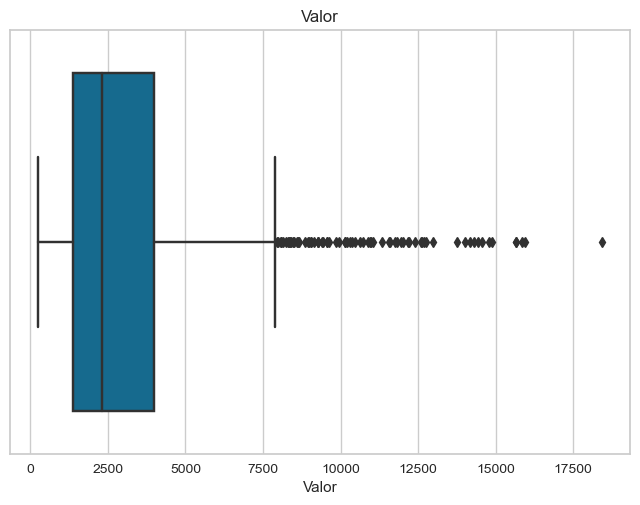

In [36]:
srn.boxplot(CreditoFinal['Valor']).set_title('Valor')

Text(0.5, 1.0, 'Valor')

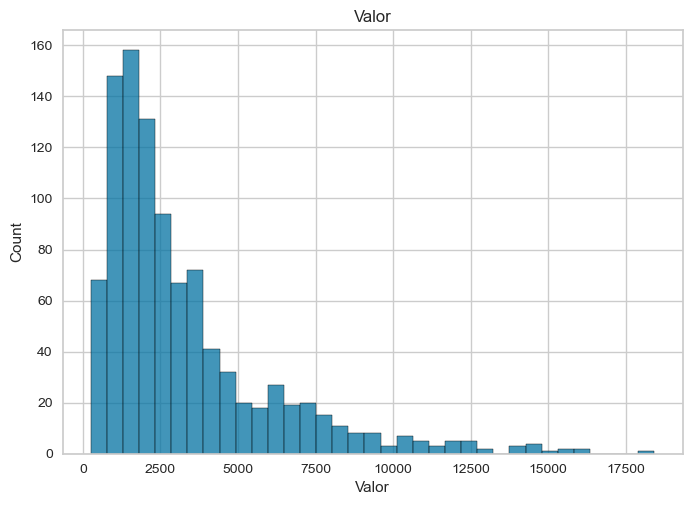

In [37]:
#Acredito que não haja erros, devido a possibilidade de emprestimos altos e baixos
srn.histplot(CreditoFinal['Valor']).set_title('Valor')

In [38]:
agrup3 = CreditoFinal.groupby(['Emprego']).size()
agrup3

Emprego
1.0    171
2.0    247
3.0    338
4.0    172
5.0     62
dtype: int64

In [39]:
CreditoFinal['Emprego'].fillna(float(3.0), inplace=True)

In [40]:
agrup3 = CreditoFinal.groupby(['Emprego']).size()
agrup3

Emprego
1.0    171
2.0    247
3.0    348
4.0    172
5.0     62
dtype: int64

In [41]:
agrup4 = CreditoFinal.groupby(['ResideDesde']).size()
agrup4

ResideDesde
1.0    129
2.0    308
3.0    147
4.0    409
dtype: int64

In [42]:
CreditoFinal['ResideDesde'].fillna(float(5.0), inplace=True)

In [43]:
agrup4 = CreditoFinal.groupby(['ResideDesde']).size()
agrup4

ResideDesde
1.0    129
2.0    308
3.0    147
4.0    409
5.0      7
dtype: int64

In [44]:
mediana2 = sts.median(CreditoFinal['ResideDesde'])
mediana2

3.0

In [45]:
CreditoFinal.loc[CreditoFinal['ResideDesde'] > 4, 'ResideDesde'] = mediana2

In [46]:
CreditoFinal.isnull().sum()

IDCrédito       0
Duração         0
HisCrédito      0
Propósito       0
Valor           0
Investimento    0
Emprego         0
TempoParcela    0
EstadoCivil     0
Fiador          0
ResideDesde     0
Idade           0
OustrosFin      0
Habit           9
ExistEmpres     0
Profissao       0
Dependente      0
SocioEmpresa    0
Estrangeiro     0
Status          0
dtype: int64

In [47]:
agrup5 = CreditoFinal.groupby(['Habit']).size()
agrup5

Habit
1.0    709
2.0    107
3.0    175
dtype: int64

In [48]:
CreditoFinal['Habit'].fillna(float(1.0), inplace=True)

In [49]:
agrup5 = CreditoFinal.groupby(['Profissao']).size()
agrup5

Profissao
1      147
2       22
3      197
4      625
999      9
dtype: int64

In [50]:
mediana3 = sts.median(CreditoFinal['Profissao'])
mediana3

4.0

In [51]:
CreditoFinal.loc[CreditoFinal['Profissao'] > 4, 'Profissao'] = mediana3

In [52]:
CreditoFinal.isnull().sum()

IDCrédito       0
Duração         0
HisCrédito      0
Propósito       0
Valor           0
Investimento    0
Emprego         0
TempoParcela    0
EstadoCivil     0
Fiador          0
ResideDesde     0
Idade           0
OustrosFin      0
Habit           0
ExistEmpres     0
Profissao       0
Dependente      0
SocioEmpresa    0
Estrangeiro     0
Status          0
dtype: int64

In [53]:
#700 pagaram e 300 inadimplentes
agrup6 = CreditoFinal.groupby(['Status']).size()
agrup6

Status
0    300
1    700
dtype: int64

In [54]:
CreditoFinal.drop('IDCrédito',axis=1,inplace=True)

In [55]:
########################
#####DADOS TRATADOS#####
########################

In [56]:
previsores = CreditoFinal.iloc[:,0:18].values
classe = CreditoFinal.iloc[:,18].values

In [57]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores,
                                                                  classe,
                                                                  test_size = 0.3,
                                                                  random_state = 0)
X_teste

array([[12.,  2.,  4., ...,  1.,  1.,  0.],
       [24.,  2.,  5., ...,  1.,  1.,  0.],
       [12.,  2.,  1., ...,  1.,  1.,  0.],
       ...,
       [ 6.,  5.,  4., ...,  2.,  0.,  0.],
       [15.,  1.,  5., ...,  1.,  1.,  0.],
       [24.,  2.,  1., ...,  1.,  0.,  0.]])

In [58]:
#Naive Bayes
naive_bayes = GaussianNB()
naive_bayes.fit(X_treinamento, y_treinamento)

GaussianNB()

In [59]:
previsoes = naive_bayes.predict(X_teste)
previsoes

array([1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1], d

In [60]:
confusao = confusion_matrix(y_teste, previsoes)
confusao

array([[ 40,  35],
       [ 44, 181]], dtype=int64)

In [61]:
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_acerto

0.7366666666666667

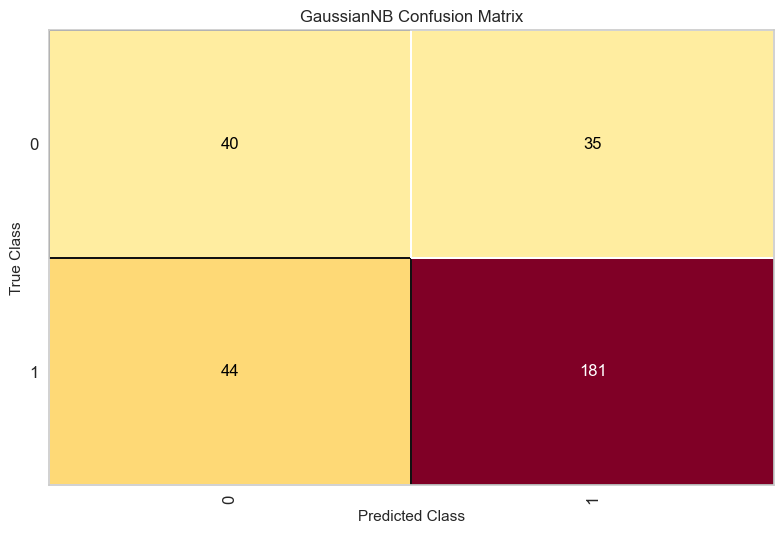

<AxesSubplot:title={'center':'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [62]:
v = ConfusionMatrix(GaussianNB())
v.fit(X_treinamento, y_treinamento)
v.score(X_teste, y_teste)
v.poof()

In [63]:
#Random Forest
floresta = RandomForestClassifier(n_estimators = 100)
floresta.fit(X_treinamento, y_treinamento)

RandomForestClassifier()

In [64]:
floresta.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=1870924975),
 DecisionTreeClassifier(max_features='auto', random_state=143509167),
 DecisionTreeClassifier(max_features='auto', random_state=1628638486),
 DecisionTreeClassifier(max_features='auto', random_state=39272848),
 DecisionTreeClassifier(max_features='auto', random_state=1120358641),
 DecisionTreeClassifier(max_features='auto', random_state=1068875262),
 DecisionTreeClassifier(max_features='auto', random_state=680721013),
 DecisionTreeClassifier(max_features='auto', random_state=1594196006),
 DecisionTreeClassifier(max_features='auto', random_state=1090756928),
 DecisionTreeClassifier(max_features='auto', random_state=1736070352),
 DecisionTreeClassifier(max_features='auto', random_state=785589604),
 DecisionTreeClassifier(max_features='auto', random_state=206585575),
 DecisionTreeClassifier(max_features='auto', random_state=352660178),
 DecisionTreeClassifier(max_features='auto', random_state=2120084381),
 DecisionTree

In [65]:
previsoes = floresta.predict(X_teste)
confusao = confusion_matrix(y_teste, previsoes)
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_acerto

0.7833333333333333

In [66]:
confusao = confusion_matrix(y_teste, previsoes)
confusao

array([[ 27,  48],
       [ 17, 208]], dtype=int64)

In [67]:
#RedeNeural
classe_dummy = np_utils.to_categorical(classe)
classe_dummy

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [68]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores,
                                                                  classe_dummy,
                                                                  test_size = 0.3,
                                                                  random_state = 0)

In [69]:
# Criação da estrutura da rede neural com a classe Sequential (sequência de camadas)
modelo = Sequential()
#primeira camada oculta, 5 neuronios, 4 neuronios de entrada
modelo.add(Dense(units = 19, input_dim = 18))
#segunda camada oculta
modelo.add(Dense(units = 11))
# Função softmax porque temos um problema de classificação com mais de duas classes 
#(é gerada uma probabilidade em cada neurônio)
modelo.add(Dense(units = 2, activation = 'softmax'))

In [70]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 19)                361       
                                                                 
 dense_1 (Dense)             (None, 11)                220       
                                                                 
 dense_2 (Dense)             (None, 2)                 24        
                                                                 
Total params: 605
Trainable params: 605
Non-trainable params: 0
_________________________________________________________________


In [71]:
# Configuração dos parâmetros da rede neural (adam = algoritmo para atualizar os pesos e loss = cálculo do erro)
modelo.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
               metrics = ['accuracy'])
# Treinamento, dividindo a base de treinamento em uma porção para validação (validation_data)
modelo.fit(X_treinamento, y_treinamento, epochs = 1000,
           validation_data = (X_teste, y_teste))

Epoch 1/1000
22/22 [==============================] - 1s 11ms/step - loss: 71.7111 - accuracy: 0.6129 - val_loss: 18.7535 - val_accuracy: 0.3433
Epoch 2/1000
22/22 [==============================] - 0s 3ms/step - loss: 10.6808 - accuracy: 0.5986 - val_loss: 11.9179 - val_accuracy: 0.3933
Epoch 3/1000
22/22 [==============================] - 0s 3ms/step - loss: 6.8270 - accuracy: 0.6043 - val_loss: 2.5888 - val_accuracy: 0.6733
Epoch 4/1000
22/22 [==============================] - 0s 3ms/step - loss: 5.0691 - accuracy: 0.5971 - val_loss: 6.2063 - val_accuracy: 0.4400
Epoch 5/1000
22/22 [==============================] - 0s 3ms/step - loss: 7.1360 - accuracy: 0.5743 - val_loss: 8.1293 - val_accuracy: 0.7500
Epoch 6/1000
22/22 [==============================] - 0s 3ms/step - loss: 11.4356 - accuracy: 0.5586 - val_loss: 14.3427 - val_accuracy: 0.7500
Epoch 7/1000
22/22 [==============================] - 0s 3ms/step - loss: 10.9182 - accuracy: 0.5671 - val_loss: 5.0897 - val_accuracy: 0.750

In [72]:
previsoes = modelo.predict(X_teste)
previsoes = (previsoes > 0.5)
previsoes

10/10 [==============================] - 0s 3ms/step


array([[False,  True],
       [False,  True],
       [False,  True],
       [ True, False],
       [False,  True],
       [False,  True],
       [False,  True],
       [ True, False],
       [ True, False],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [ True, False],
       [ True, False],
       [ True, False],
       [False,  True],
       [False,  True],
       [ True, False],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [ True, False],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [ True, False],
       [False,  True],
       [False,  True],
       [False,  True],
       [ True, False],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [Fal

In [73]:
y_teste_matrix = [np.argmax(t) for t in y_teste]
y_previsao_matrix = [np.argmax(t) for t in previsoes]

In [74]:
confusao = confusion_matrix(y_teste_matrix, y_previsao_matrix)
confusao

array([[ 35,  40],
       [ 30, 195]], dtype=int64)

In [75]:
taxa_acerto = accuracy_score(y_teste_matrix, y_previsao_matrix)
taxa_acerto

0.7666666666666667

UTILIZANDO OS CONCEITOS E PRÁTICAS ADQUIRIDOS DURANTE O CURSO, FOI POSSÍVEL A CONSTRUÇÃO DE UM MODELO DE MACHINE LEARNING E DE UMA REDE NEURAL QUE CUMPRIRAM O OBJETIVO.
O MODELO COM MELHOR TAXA DE ACERTO FOI O RANDOM FOREST COM 77,3% , PORÉM, O NAIVE BAYES APRESENTOU MELHOR RESULTADO, UM VEZ QUE COM A PREDIÇÃO DE QUEM SERÁ PAGADOR OU NÃO, É POSSÍVEL CALCULAR A TAXA DE ACERTO APENAS ENTRE AS PESSOAS QUE O MODELO CONCEDERIA O EMPRESTIMO, CHEGANDO EM UM VALOR DE APROXIMADAMENTE 84% DE SUCESSO.
